# Notebook testing some Stone Soup astro routines

In [1]:
# Import libraries
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from stonesoup.types.orbitalstate import OrbitalState
from stonesoup.models.transition.orbital.orbit import SimpleMeanMotionTransitionModel, CartesianTransitionModel

In [2]:
# Set the initial time and increment 
time = datetime(2011, 11, 12, 13, 45, 31)  # No reason
deltat = timedelta(seconds=60) # Propagate in discrete time at minute intervals

In [3]:
# Initialise state vector
# Define in 6-d Cartesian coordinates [km, km/s]
ini_cart = np.array([[7000], [-12124], [0], [2.6679], [4.621], [0]])
state = OrbitalState(ini_cart, coordinates="Cartesian", timestamp=time)
state.grav_parameter = 398600 # Because we're in km, rather than m

In [4]:
# Initialise (switch between) transition model
# propagator = SimpleMeanMotionTransitionModel()
propagator = CartesianTransitionModel()

In [5]:
# Initialise arrays for plotting
all_xy = np.array([state.cartesian_state_vector[0], state.cartesian_state_vector[1]])

In [6]:
# Run a loop - increment time, calculate state, stop after 6hrs
while time < datetime(2011, 11, 12, 13, 45, 31) + timedelta(minutes=360):
    state = propagator.transition(state, deltat)
    all_xy = np.append(all_xy, np.array([state.cartesian_state_vector[0], state.cartesian_state_vector[1]]), axis=1)
    time = time + deltat

In [7]:
# For to plot the earth's radius
th = np.arange(0, 2*np.pi, np.pi/100)
xx = 6371*np.cos(th)
yy = 6371*np.sin(th)

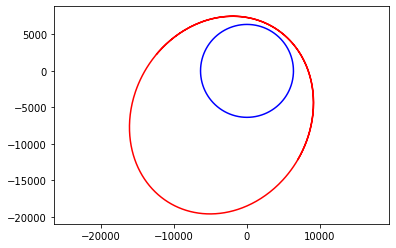

In [8]:
# Plot 
plt.plot(xx,yy,color="blue") # Do we miss the earth's surface?
plt.plot(all_xy[:][0], all_xy[:][1], color="red") # Just about
plt.gcf().gca().axis('equal')
plt.show()